In [1]:
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from google.colab import drive
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline 

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root = '/content/drive/My Drive/TeleComm.csv'

In [4]:
df = pd.read_csv(root)

In [5]:
df.head

<bound method NDFrame.head of      region  tenure  age  marital  ...  retire  gender  reside  custcat
0         2      13   44        1  ...     0.0       0       2        1
1         3      11   33        1  ...     0.0       0       6        4
2         3      68   52        1  ...     0.0       1       2        3
3         2      33   33        0  ...     0.0       1       1        1
4         2      23   30        1  ...     0.0       0       4        3
..      ...     ...  ...      ...  ...     ...     ...     ...      ...
995       3      10   39        0  ...     0.0       1       3        1
996       1       7   34        0  ...     0.0       1       1        1
997       3      67   59        0  ...     0.0       1       1        4
998       3      70   49        0  ...     0.0       1       1        3
999       3      50   36        1  ...     0.0       1       3        2

[1000 rows x 12 columns]>

In [6]:
df.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [7]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31b86b2f90>]],
      dtype=object)

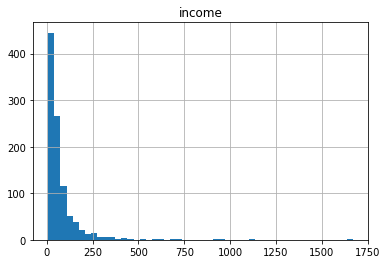

In [8]:
df.hist(column = 'income', bins=50)

In [9]:
df.columns


Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   0.,   0.,   4.]])

In [11]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.22207644, -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.22207644, -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088, -0.22207644,  0.96655883, -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -0.22207644,  0.96655883, -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.22207644, -1.03459817,  1.16300577]])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
k = 4

In [15]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [16]:
yhat = model.predict(X_test)
yhat[0:5]

array([3, 3, 2, 2, 4])

In [17]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.5475
Test set Accuracy: 0.295


In [18]:
from sklearn.neighbors import KNeighborsClassifier
k = 6

In [19]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [20]:
yhat = model.predict(X_test)
yhat[0:5]

array([3, 3, 1, 4, 4])

In [21]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.51125
Test set Accuracy: 0.275


In [22]:
from sklearn.neighbors import KNeighborsClassifier
k = 7

In [23]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [24]:
yhat = model.predict(X_test)
yhat[0:5]

array([3, 1, 2, 2, 4])

In [25]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.53375
Test set Accuracy: 0.31


In [26]:
from sklearn.neighbors import KNeighborsClassifier
k = 8

In [27]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [28]:
yhat = model.predict(X_test)
yhat[0:5]

array([3, 1, 2, 2, 4])

In [29]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.47875
Test set Accuracy: 0.31


In [30]:
from sklearn.neighbors import KNeighborsClassifier
k = 9

In [31]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [32]:
yhat = model.predict(X_test)
yhat[0:5]

array([3, 1, 2, 2, 4])

In [33]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.49125
Test set Accuracy: 0.325


In [34]:
from sklearn.neighbors import KNeighborsClassifier
k = 3

In [35]:
model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [36]:
yhat = model.predict(X_test)
yhat[0:5]

array([1, 3, 1, 4, 4])

In [37]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat) )

Train set Accuracy: 0.57
Test set Accuracy: 0.335


In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMat = [];
for n in range(1,Ks):

  #Train model and predict
  model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
  yhat = model.predict(X_test)
  mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


  std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.295, 0.31 , 0.335, 0.295, 0.32 , 0.275, 0.31 , 0.31 , 0.325])

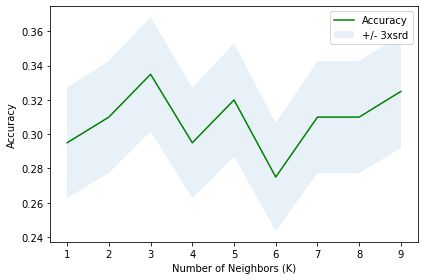

In [39]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xsrd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
from sklearn import metrics

In [41]:
metrics.jaccard_score(y_test, yhat, average = 'weighted')

0.18963751526251524